In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

from utils.visualize import *
from utils.FIR_filter import *
from utils.signal_process import *
from utils.preprocess import *

import os

# ANC Action

In [2]:
# args
fs = 10
start_pt = 0
end_pt = -1
still_pt = 300
after_still_pt = 0
pool = 1.0
d = 0.1

dataset_folder = 'data/10P'
window_size = 256
stride = 64

target_folder: data/10P\test
data/10P\test\run_0514_1048.csv
best_score/total: 55/300
data/10P\test\run_0520_0735.csv


c:\Users\user\anaconda3\envs\rr\lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\user\anaconda3\envs\rr\lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\user\anaconda3\envs\rr\lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\user\anaconda3\envs\rr\lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


best_score/total: 167/300
data/10P\test\run_0520_1036.csv
best_score/total: 137/300
data/10P\test\run_0604_0714.csv
best_score/total: 171/300
data/10P\test\run_0604_0733.csv
best_score/total: 300/300
data/10P\test\sit_0514_1030.csv
best_score/total: 300/300
data/10P\test\sit_0520_0719.csv
best_score/total: 203/300
data/10P\test\sit_0520_1022.csv
best_score/total: 300/300
data/10P\test\sit_0604_0658.csv
best_score/total: 300/300
data/10P\test\stand_0514_1035.csv
best_score/total: 45/300
data/10P\test\stand_0520_0724.csv
best_score/total: 300/300
data/10P\test\stand_0520_1027.csv
best_score/total: 300/300
data/10P\test\stand_0604_0703.csv
best_score/total: 300/300
data/10P\test\walk_0514_1043.csv
best_score/total: 227/300
data/10P\test\walk_0520_0730.csv
best_score/total: 208/300
data/10P\test\walk_0520_1031.csv
best_score/total: 191/300
data/10P\test\walk_0604_0710.csv
best_score/total: 294/300
LMS:
sit - L1 Loss: 2.1531 1/min, E%: 16.0096%
stand - L1 Loss: 8.9962 1/min, E%: 51.7944%
wa

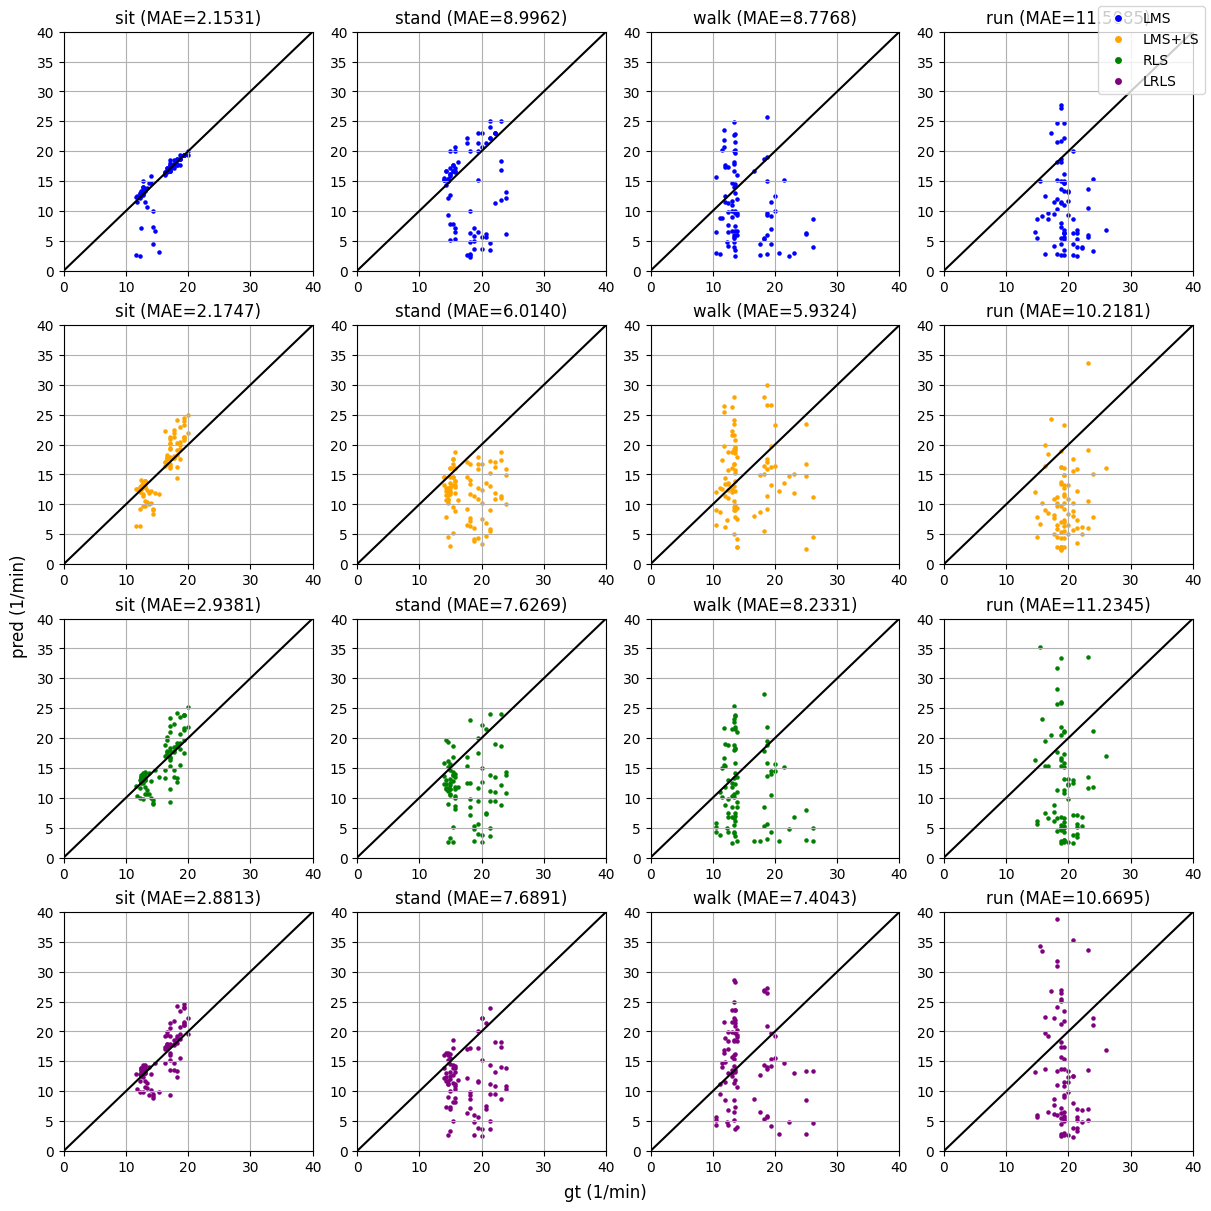

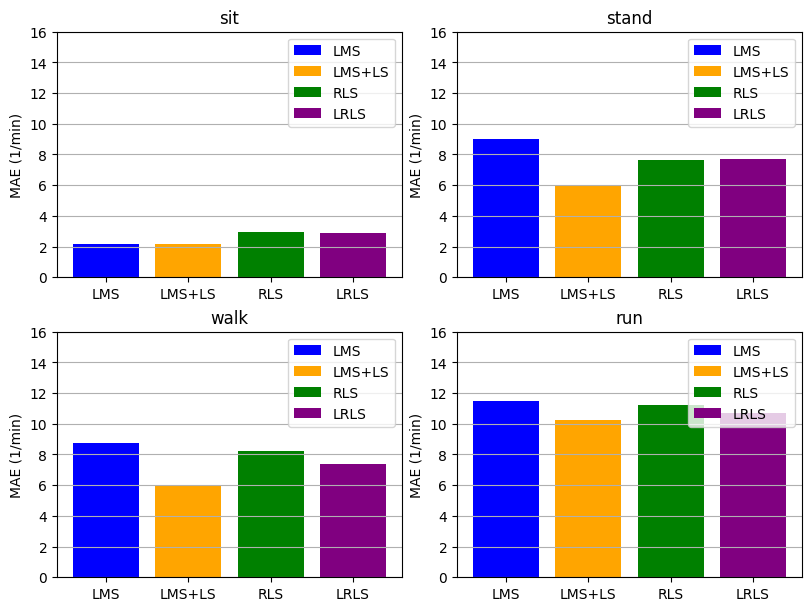

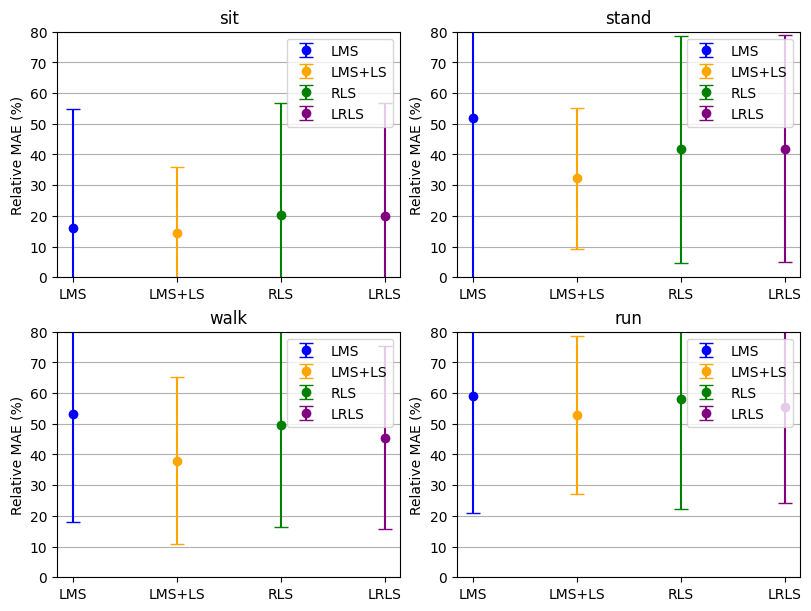

In [3]:
tp = "test"
target_folder = os.path.join(dataset_folder, tp)
print(f"target_folder: {target_folder}")

prepare_data_anc(target_folder,
                fs=fs,
                start_pt=start_pt,
                end_pt=end_pt,
                still_pt=still_pt,
                after_still_pt=after_still_pt,
                pool=pool,
                d=d,
                window_size=window_size,
                stride=stride,)